# Loading data and libraries

In [38]:
suppressWarnings({
    library(caret);library(ggplot2); library(lubridate); library(plotly); library(dplyr)
})

In [63]:
data_raw = read.csv("../datasets/Dataset 3 Beijing/cleaned_beijing.csv")
head(data_raw)

X,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
1,116.4755,40.01952,1.111027e+12,2016-08-09,1464,106,415.0,31680,131.00,...,Tower,2005,Simplicit,Steel/Concrete,0.217,Has_Elevator,Ownership > 5y,Has_Subway,ChaoYang,56021
2,116.4539,39.88153,1.111027e+12,2016-07-28,903,126,575.0,43436,132.38,...,Tower,2004,Hardcover,Steel/Concrete,0.667,Has_Elevator,Ownership < 5y,No_Subway,ChaoYang,71539
3,116.5620,39.87714,1.111041e+12,2016-12-11,1271,48,1030.0,52021,198.00,...,Plate,2005,Simplicit,Steel/Concrete,0.500,Has_Elevator,Ownership > 5y,No_Subway,ChaoYang,48160
4,116.4380,40.07611,1.111043e+12,2016-09-30,965,138,297.5,22202,134.00,...,Tower,2008,Other,Steel/Concrete,0.273,Has_Elevator,Ownership > 5y,No_Subway,ChangPing,51238
5,116.4284,39.88623,1.111027e+12,2016-08-28,927,286,392.0,48396,81.00,...,Plate,1960,Rough,Mixed,0.333,No_elevator,Ownership < 5y,Has_Subway,DongCheng,62588
6,116.4663,39.99136,1.111027e+12,2016-07-22,861,57,275.6,52000,53.00,...,Plate,2005,Simplicit,Steel/Concrete,0.333,Has_Elevator,Ownership < 5y,No_Subway,ChaoYang,67738


In [40]:
names(data_raw)

[1] "X"                   "Lng"                 "Lat"                
 [4] "Cid"                 "tradeTime"           "DOM"                
 [7] "followers"           "totalPrice"          "price"              
[10] "square"              "livingRoom"          "drawingRoom"        
[13] "kitchen"             "bathRoom"            "floor"              
[16] "buildingType"        "constructionTime"    "renovationCondition"
[19] "buildingStructure"   "ladderRatio"         "elevator"           
[22] "fiveYearsProperty"   "subway"              "district"           
[25] "communityAverage"

### Splitting data

In [66]:
set.seed(193)
inTrain = createDataPartition(data_raw$price, p = 0.7, list = F)
train = data_raw[inTrain,]
test = data_raw[-inTrain,]

In [67]:
data = select(train, square, constructionTime, subway, district)
head(data)

,square,constructionTime,subway,district
2,132.38,2004,No_Subway,ChaoYang
4,134.00,2008,No_Subway,ChangPing
6,53.00,2005,No_Subway,ChaoYang
8,161.55,2004,No_Subway,ChaoYang
9,48.00,2009,No_Subway,MenTouGou
10,68.00,2009,Has_Subway,DongCheng


In [68]:
sapply(data, class)

square constructionTime           subway         district 
       "numeric"        "integer"         "factor"         "factor"

In [69]:
sapply(data[,c(3,4)], function(x){
    as.character(unique(x))
})

$subway
[1] "No_Subway"  "Has_Subway"

$district
 [1] "ChaoYang"    "ChangPing"   "MenTouGou"   "DongCheng"   "XiCheng"    
 [6] "FengTai"     "HaiDian"     "DaXing"      "FaXing"      "FangShang"  
[11] "ShiJingShan" "ShunYi"      "TongZhou"

In [70]:
sapply(data[,c(1,2)], function(x){
    range(x)
})

square,constructionTime
7.37,1950
640.00,2016


In [71]:
mdl = get(load(file = "./shinyApp/models/final_model.rda", .GlobalEnv))

In [72]:
predict(mdl, newdata = data.frame(data[1,]))

2 
39921.63

In [73]:
summary(mdl)


Call:
lm(formula = price ~ square + constructionTime + subway + district, 
    data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-60521 -11302  -3494   9148 110650 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         46385.147  10043.760   4.618 3.87e-06 ***
square                -32.172      1.187 -27.115  < 2e-16 ***
constructionTime       -5.566      5.033  -1.106 0.268789    
subwayNo_Subway     -3617.244     84.423 -42.847  < 2e-16 ***
districtChaoYang    12567.549    134.081  93.731  < 2e-16 ***
districtDaXing       1490.482    465.753   3.200 0.001374 ** 
districtDongCheng   29317.966    208.411 140.674  < 2e-16 ***
districtFangShang   -1596.010    427.038  -3.737 0.000186 ***
districtFaXing       -243.483    209.289  -1.163 0.244676    
districtFengTai      7302.716    171.187  42.659  < 2e-16 ***
districtHaiDian     24022.255    162.211 148.093  < 2e-16 ***
districtMenTouGou   -5370.276    251.356 -21.365  < 2e-16 ***
d

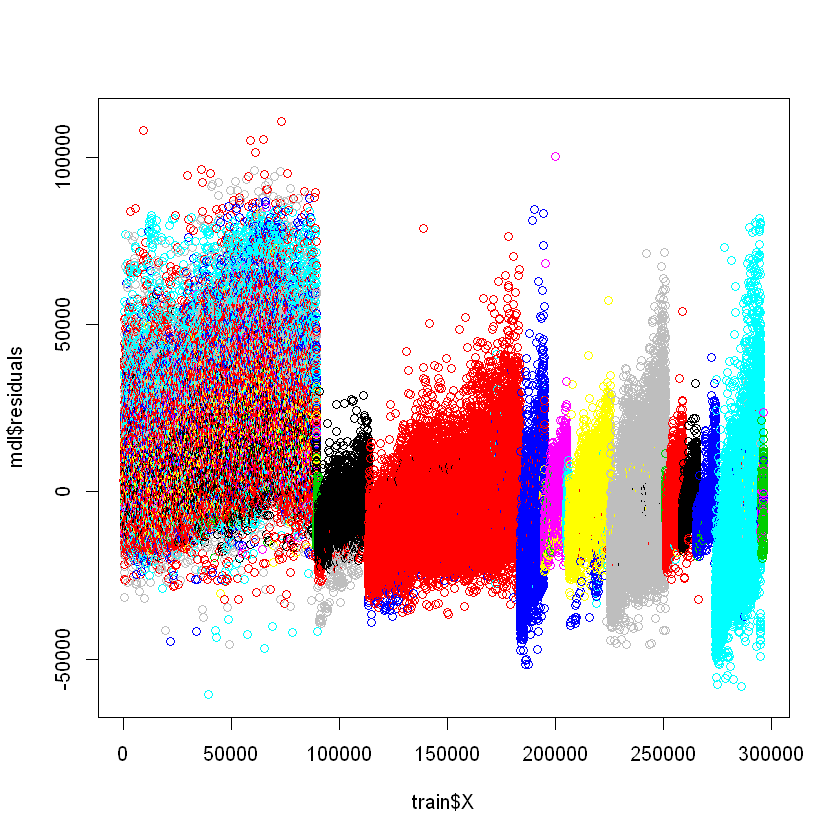

In [84]:
plot(train$X, mdl$residuals, col = train$district)